# t-SNE on the Statcast Homerun Data

## By Christopher Hauman
<br>

### This apply the t-SNE algorithm tothe Statcast Homeruns Data we cleaned in [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://nbviewer.jupyter.org/github/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb). Let's see if we can pick out any patterns! 
<br>

If you're not familiar with the t-SNE algorithm, you can find an introduction in my guide on [t-SNE Classification on the Iris Dataset with scikit-learn](https://nbviewer.jupyter.org/github/chrisman1015/Unsupervised-Learning/blob/master/t-SNE%20on%20the%20Iris%20Dataset%20with%20scikit-learn/t-SNE%20classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn.ipynb).

In [1]:
# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

Import Statcast Homerun Data:

In [15]:
# import csv file to df_raw DataFrame
df_hr = pd.read_csv("cleaned_allhr2018.csv", index_col=0)
df_hr.head()

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
0,48,Khris Davis,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93
1,43,J.D. Martinez,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05
2,40,Joey Gallo,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96
3,39,Jose Ramirez,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09
4,39,Mike Trout,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90


We'll get rid of the names, as we don't want any string variables to interfere with the model.

In [16]:
df_no_name = df_hr.drop('player_name', axis=1)
df_no_name.head()

,home_runs,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension
0,48,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93
1,43,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05
2,40,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96
3,39,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09
4,39,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90


In [17]:
# turn hr data into numpy array
hr_array = np.array(df_no_name)

#intialize model
model_hr = TSNE(learning_rate=100, random_state=2)

# fit model to hr array
transformed_hr = model_hr.fit_transform(hr_array)

Now let's add those transformed values back into the original hr_df so we can plot them:

In [18]:
df_transformed_hr = pd.DataFrame(transformed_hr)
df_transformed_hr.columns = ['x', 'y']
df_hr['x'] = df_transformed_hr['x']
df_hr['y'] = df_transformed_hr["y"]

df_hr.head()

,home_runs,player_name,total_pitches,pitch_percent,xwoba,xba,launch_speed,launch_angle,spin_rate,velocity,effective_speed,release_extension,x,y
0,48,Khris Davis,2514,1.9,1.671,0.861,105.9,27.3,2269.0,89.6,89.01,5.93,-34.255886,-8.315507
1,43,J.D. Martinez,2519,1.7,1.537,0.792,105.0,28.2,2118.0,88.8,88.46,6.05,-31.102888,-9.254650
2,40,Joey Gallo,2348,1.7,1.588,0.806,107.7,29.4,2164.0,88.6,88.14,5.96,-30.598183,-3.007089
3,39,Jose Ramirez,3002,1.3,1.152,0.620,101.3,28.8,2192.0,91.6,91.37,6.09,-36.027676,-17.875238
4,39,Mike Trout,2543,1.5,1.543,0.809,106.5,28.0,2203.0,87.8,87.11,5.90,-32.902843,-9.709676


Now we'll iterate through the transformed t-SNE data with the hue as each variable in df_hr. We want to see if there's any clustering or strong patterns.

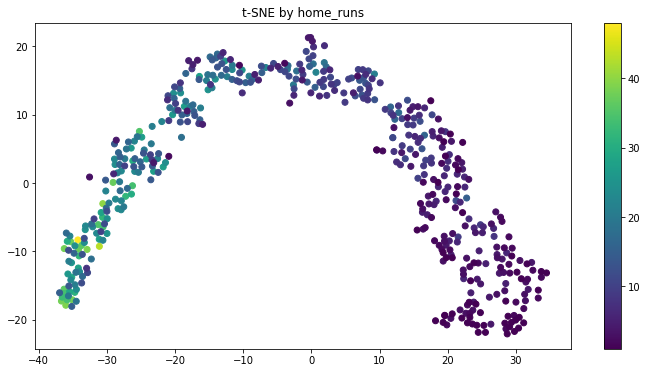

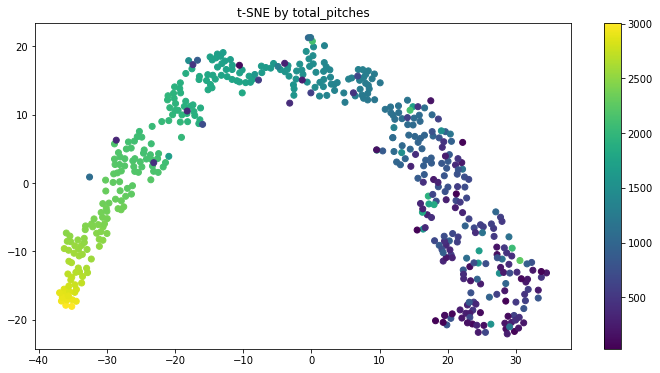

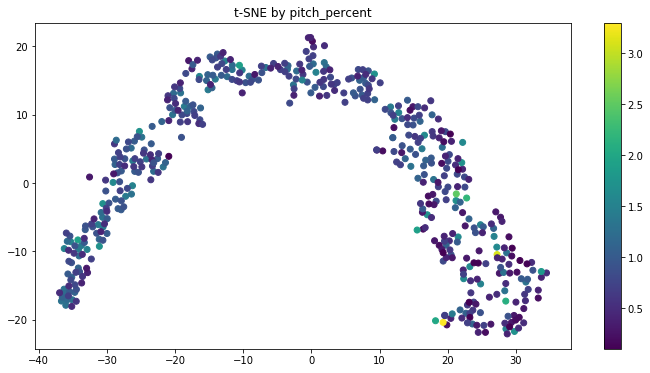

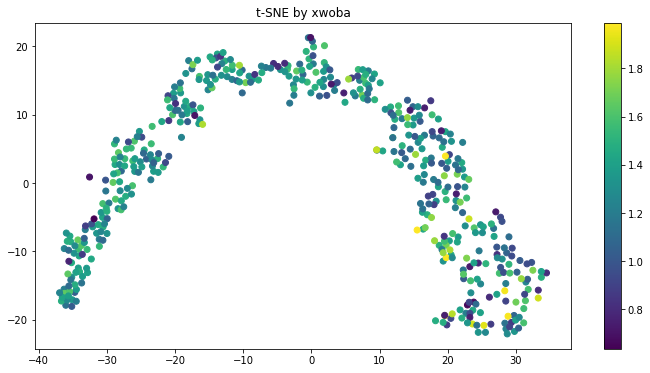

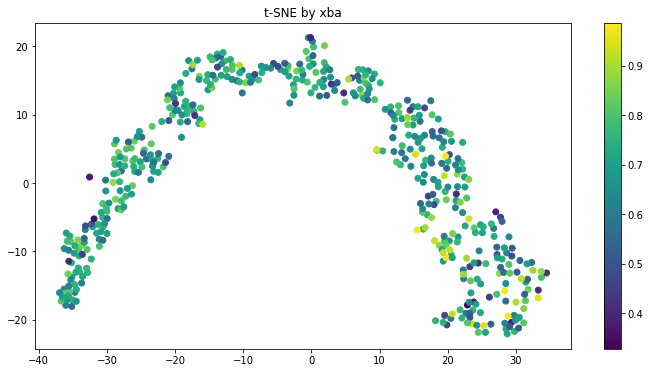

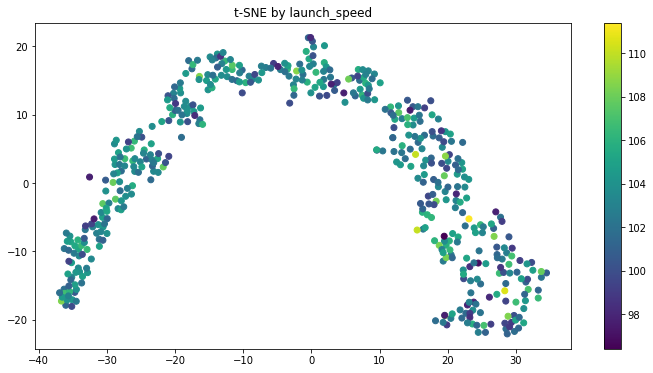

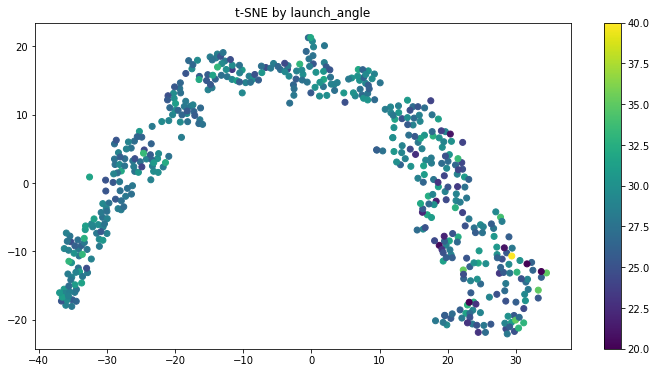

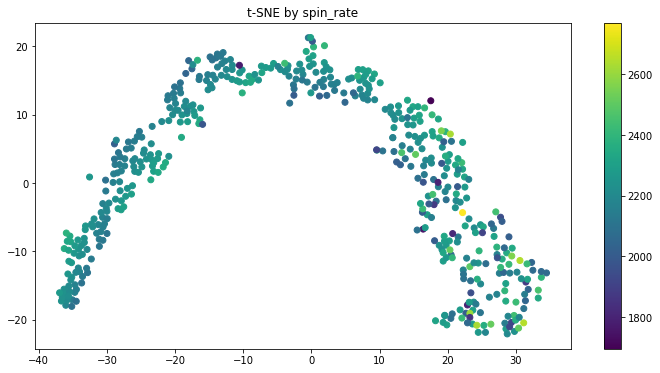

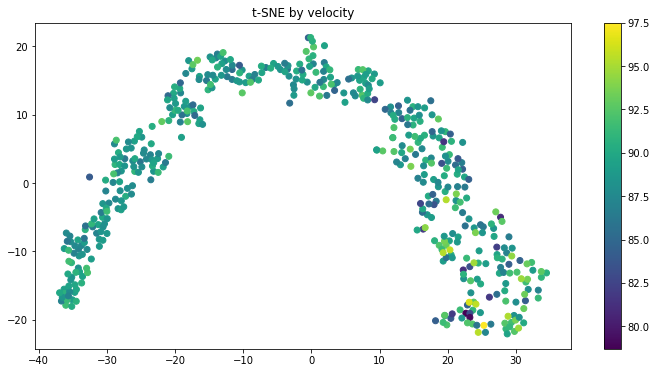

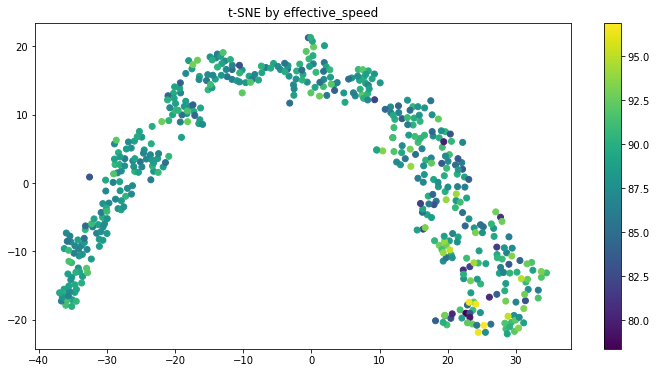

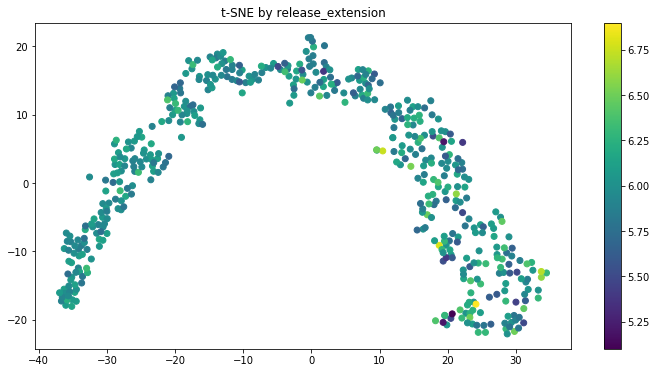

In [105]:
for i in df_hr.drop(['player_name', 'x', 'y'], axis=1):
    plt.figure(figsize=(12,6))
    points = plt.scatter(df_hr['x'], df_hr['y'], c=df_hr[i])
    plt.title("t-SNE by " + str(i))
    plt.colorbar(points)
    plt.show()